In [1]:
%pip install qiskit qiskit-aer qiskit-ibm-runtime matplotlib pylatexenc

  Using cached qiskit-2.3.0-cp310-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (12 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached rustworkx-0.17.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached scipy-1.17.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached dill-0.4.1-py3-none-any.whl.metadata (10 kB)
  Using cached stevedore-5.6.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_inspection-0.4.2-py3-none-any.whl.metadata (2.6 kB)
Using cached qiskit-2.3.0-cp310-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 1.9 MB/s  0:00:09m0:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━

In [2]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator # The local simulator

print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.3.0


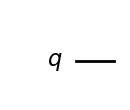

In [3]:
from qiskit import QuantumCircuit

# Create a circuit with 1 qubit
qc = QuantumCircuit(1)

# Draw the circuit
qc.draw('mpl')

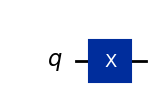

In [4]:
qc_x = QuantumCircuit(1)

# Apply X-gate (NOT)
qc_x.x(0) 

# Draw it
qc_x.draw('mpl')

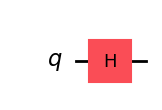

In [5]:
qc_h = QuantumCircuit(1)

# Apply Hadamard gate
qc_h.h(0)

# Draw it
qc_h.draw('mpl')

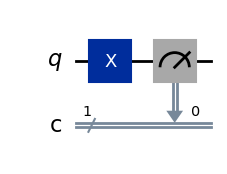

In [6]:
# Create circuit with 1 Qubit and 1 Classical Bit
qc_measure = QuantumCircuit(1, 1)

# Apply H gate to put it in superposition
qc_measure.x(0)

# Measure Qubit 0 and store result in Classical Bit 0
# Format: measure(qubit_index, bit_index)
qc_measure.measure(0, 0)

qc_measure.draw('mpl')

Counts: {'1': 1000}


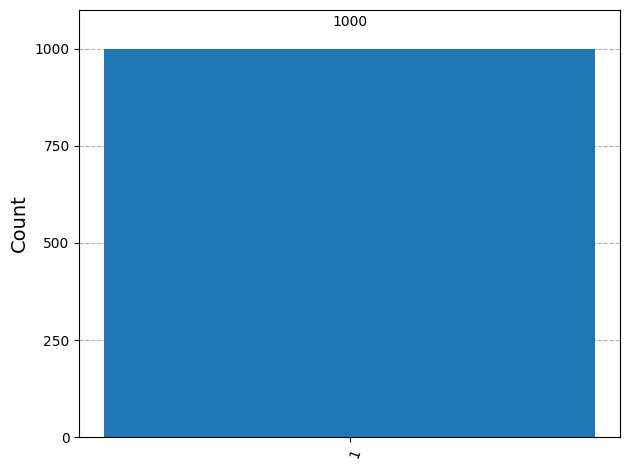

In [7]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1. Set up the simulator
sim = AerSimulator()

# 2. Run the circuit (shots=1000 means we repeat the experiment 1000 times)
job = sim.run(qc_measure, shots=1000)

# 3. Get results
result = job.result()
counts = result.get_counts()

print("Counts:", counts)
plot_histogram(counts)

In [8]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# --- Experiment 1: The X-Gate (No Superposition) ---
qc_x = QuantumCircuit(1)
qc_x.x(0)      # Flip to |1>
qc_x.measure_all()

# --- Experiment 2: The H-Gate (Superposition) ---
qc_h = QuantumCircuit(1)
qc_h.h(0)      # Spin to 50/50
qc_h.measure_all()

# --- Run Both ---
sim = AerSimulator()
result_x = sim.run(qc_x, shots=1000).result().get_counts()
result_h = sim.run(qc_h, shots=1000).result().get_counts()

print("X-Gate Results (Deterministic):", result_x)
print("H-Gate Results (Probabilistic):", result_h)

X-Gate Results (Deterministic): {'1': 1000}
H-Gate Results (Probabilistic): {'0': 525, '1': 475}


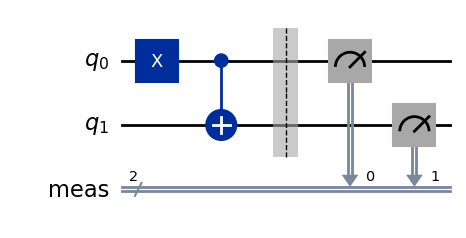

In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Create a circuit with 2 Qubits
qc = QuantumCircuit(2)

# 1. PREPARE: Let's flip Qubit 0 to |1> so it acts as a "Trigger"
qc.x(0) 

# 2. ACTION: Apply CNOT
# Syntax: qc.cx(control_qubit, target_qubit)
# We want Qubit 0 to control Qubit 1
qc.cx(0, 1)

# 3. MEASURE: See what happened
qc.measure_all()

# Draw the circuit
qc.draw('mpl')

In [10]:
from qiskit_aer import AerSimulator

sim = AerSimulator()
result = sim.run(qc).result().get_counts()
print("Result:", result)

Result: {'11': 1024}


#### The Bell State (Entanglement)

Circuit Diagram:


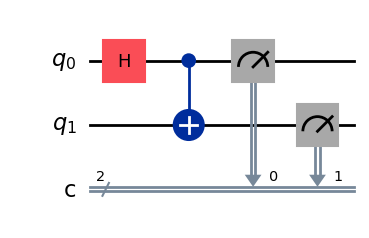

In [11]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1. Create Circuit (2 Qubits, 2 Classical Bits)
qc_bell = QuantumCircuit(2, 2)

# 2. H-Gate on Qubit 0 (Create Superposition)
qc_bell.h(0)

# 3. CNOT Gate (Entangle them)
# Qubit 0 is the Control, Qubit 1 is the Target
qc_bell.cx(0, 1)

# 4. Measure Both
qc_bell.measure([0, 1], [0, 1])

# Draw the circuit
print("Circuit Diagram:")
qc_bell.draw('mpl')


Results: {'11': 491, '00': 509}


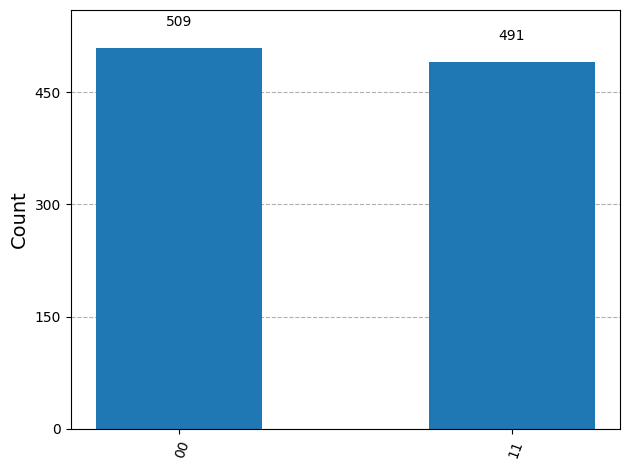

In [12]:
# Run the experiment
sim = AerSimulator()
job = sim.run(qc_bell, shots=1000)
result = job.result()
counts = result.get_counts()

print("\nResults:", counts)
plot_histogram(counts)

Circuit with Rotation:


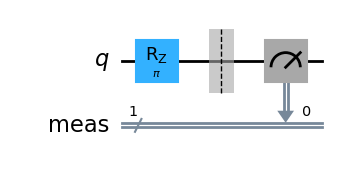

In [13]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1. Create a circuit
qc_rot = QuantumCircuit(1)

# 2. Apply Rotation
# Syntax: qc.ry(angle, qubit)
# Let's rotate by PI/2 (90 degrees)
angle = np.pi 
qc_rot.rz(angle, 0)

# 3. Measure
qc_rot.measure_all()

# Draw
print("Circuit with Rotation:")
qc_rot.draw('mpl')

Angle: 3.14 radians
Counts: {'0': 10000}


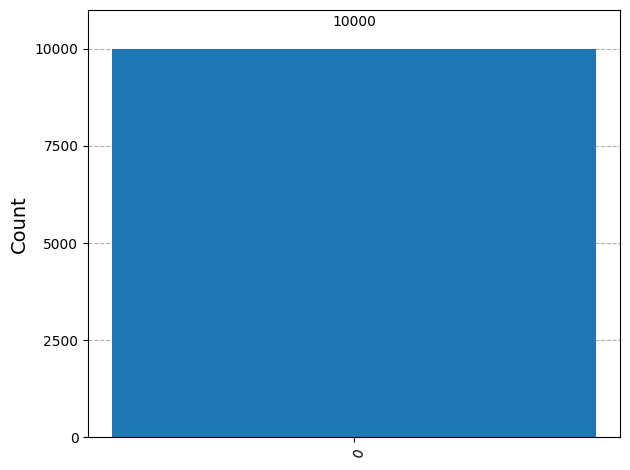

In [14]:
sim = AerSimulator()
job = sim.run(qc_rot, shots=10000)
counts = job.result().get_counts()

print(f"Angle: {angle:.2f} radians")
print("Counts:", counts)
plot_histogram(counts)